Steve Brunton SVD: https://www.youtube.com/playlist?list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv

# Image compression

(1788, 1200)


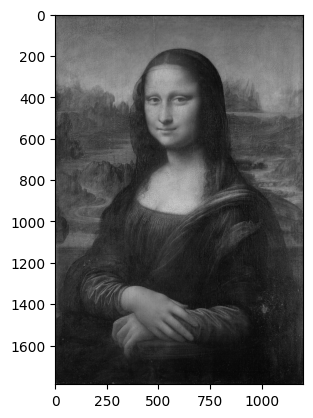

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("mona_lisa.jpg")
img = np.array(img)

img = img.mean(axis=-1)

print(img.shape)
plt.imshow(img, cmap="grey");

(1788, 1200) (1200,) (1200, 1200)


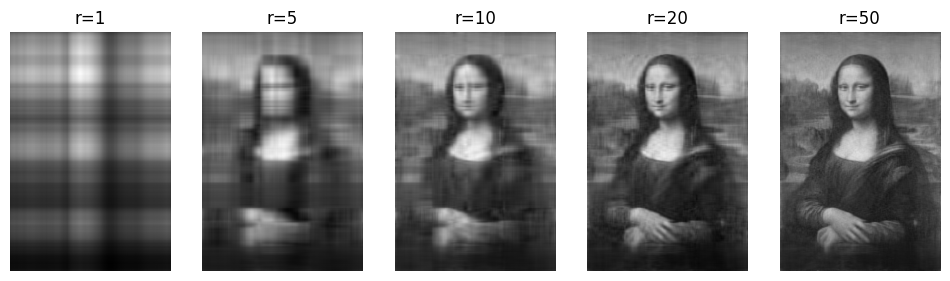

In [2]:
u, s, vt = np.linalg.svd(img, full_matrices=False)
print(u.shape, s.shape, vt.shape)

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 8))
rs = [1, 5, 10, 20, 50]
for (ax, r) in zip(axs, rs):
    img_r = u[:, :r] * s[:r] @ vt[:r]
    ax.imshow(img_r, cmap="grey")
    ax.set_title(f"r={r}")
    ax.set_axis_off()

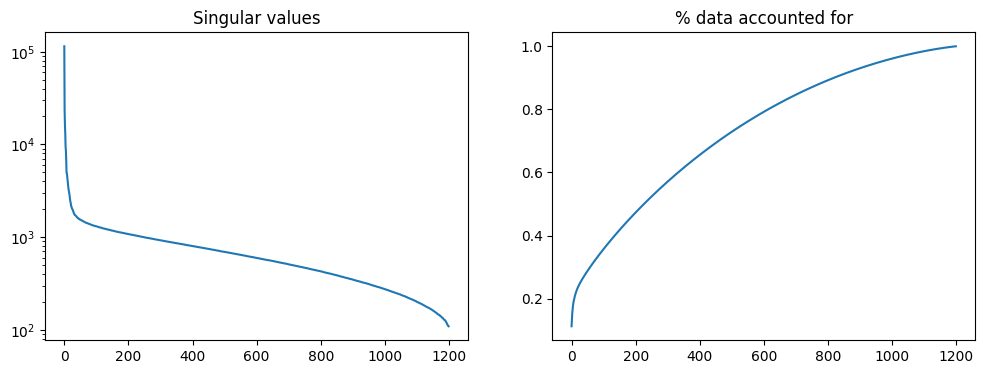

In [3]:
def plot_singular_vals(s):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    ax0.plot(s)
    ax0.set_yscale("log")
    ax0.set_title("Singular values")

    ax1.plot(np.cumsum(s) / np.sum(s))
    ax1.set_title("% data accounted for")
    plt.show()

plot_singular_vals(s)

# Eigenface

In [4]:
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()
data

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], shape=(400, 4096), dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ...

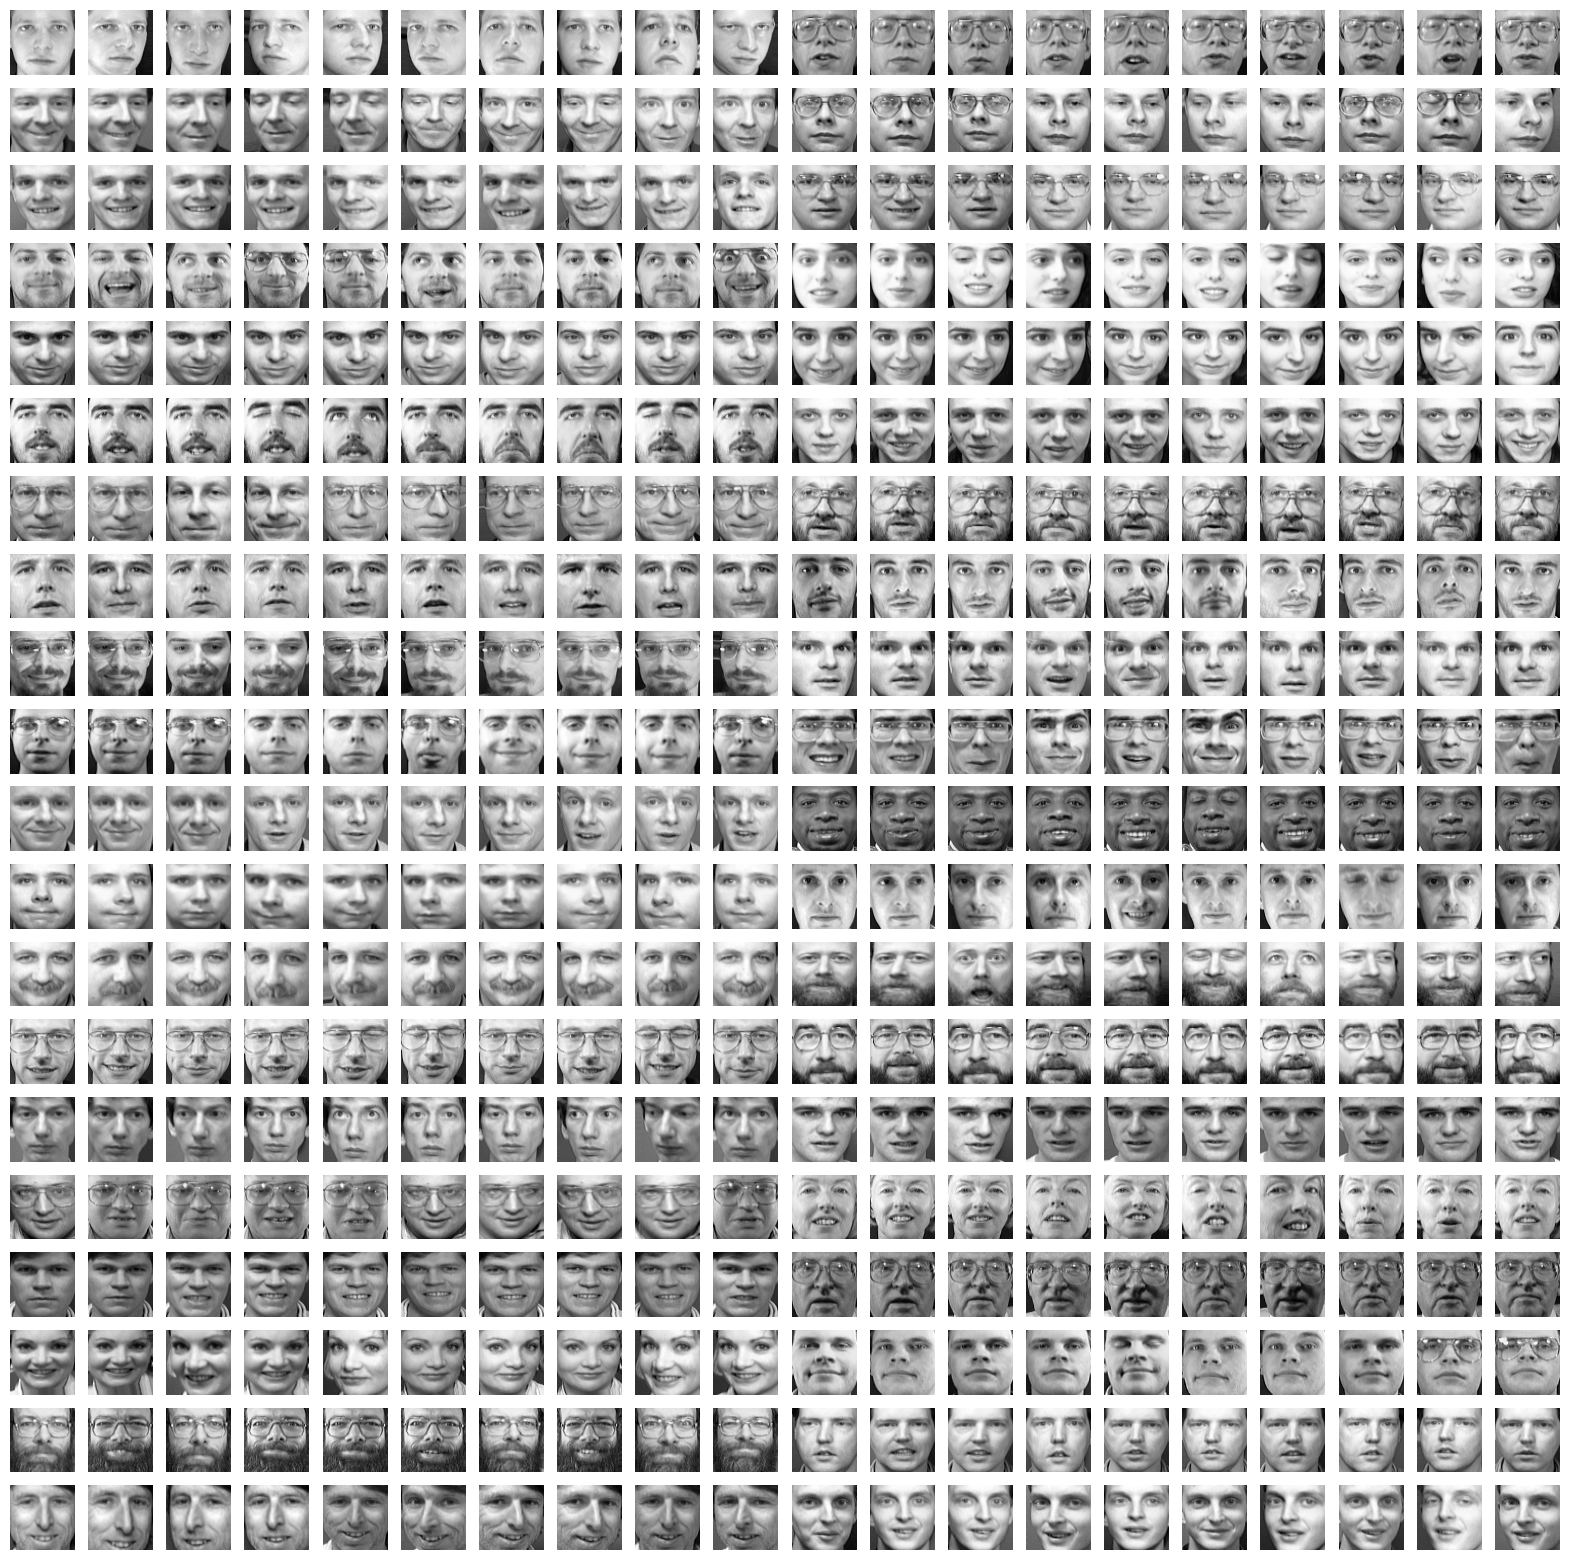

In [5]:
fig, axs = plt.subplots(nrows=20, ncols=20, figsize=(20, 20))
for (i, ax) in enumerate(axs.flat):
    ax.imshow(data["images"][i], cmap="grey")
    ax.set_axis_off()

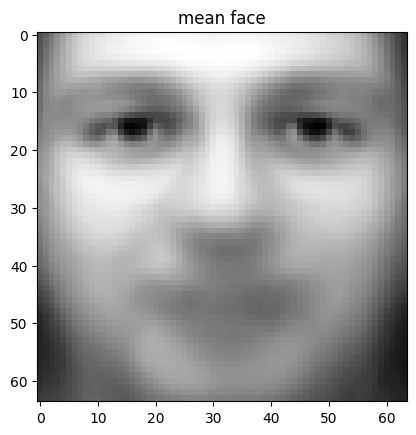

(4096, 400) (4096, 400) (400,) (400, 400)


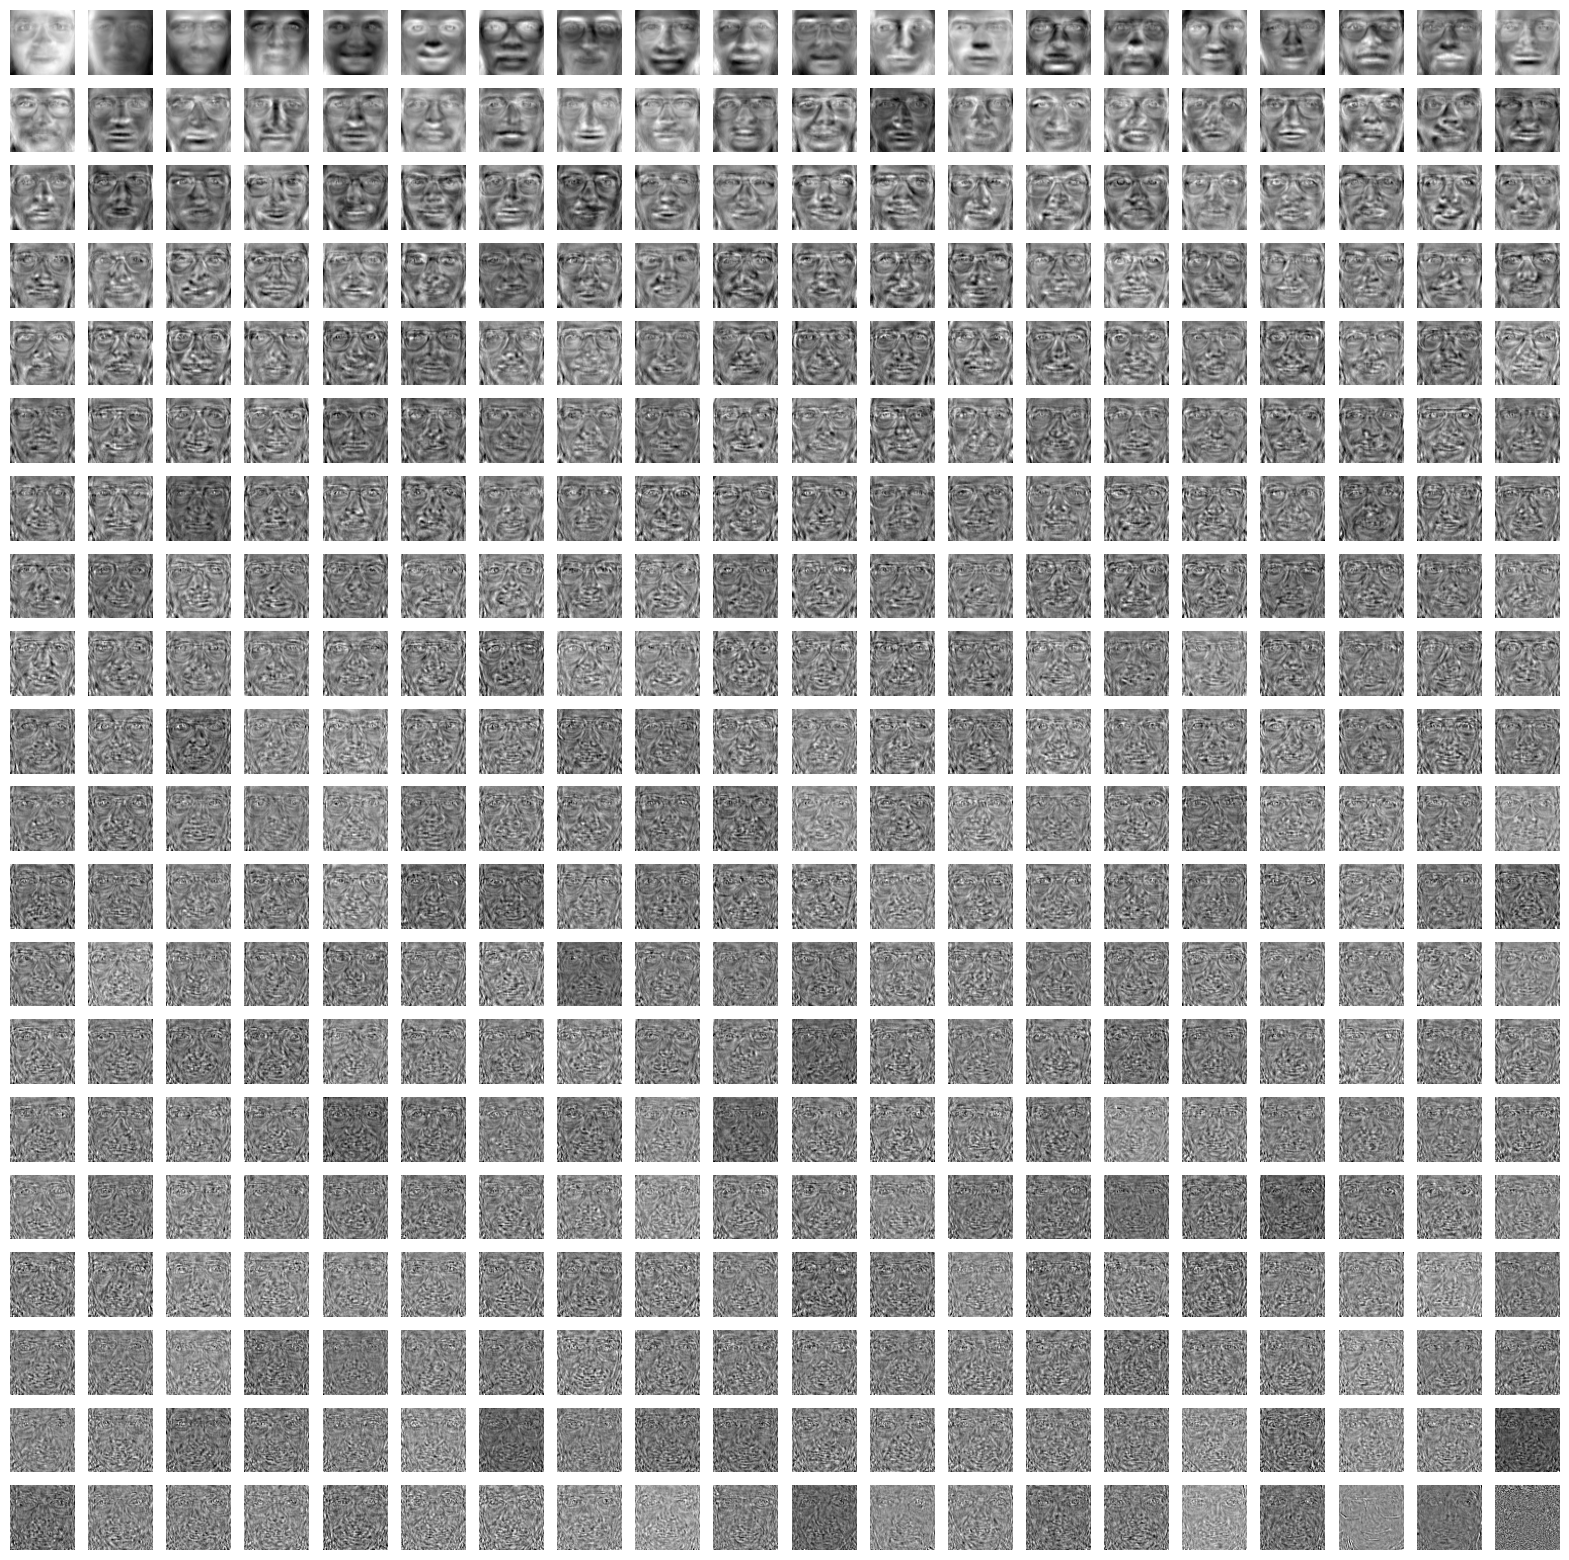

In [6]:
x = data["data"].T

x_mean = x.mean(axis=1, keepdims=True)
plt.imshow((x_mean.reshape(64, 64)), cmap="grey")
plt.title("mean face")
plt.show()

x_centered = x - x_mean
u, s, vt = np.linalg.svd(x_centered, full_matrices=False)
print(x_centered.shape, u.shape, s.shape, vt.shape)

fig, axs = plt.subplots(nrows=20, ncols=20, figsize=(20, 20))
for (i, ax) in enumerate(axs.flat):
    eigenface = u[:, i].reshape(64, 64)
    ax.imshow(eigenface, cmap="grey")
    ax.set_axis_off()

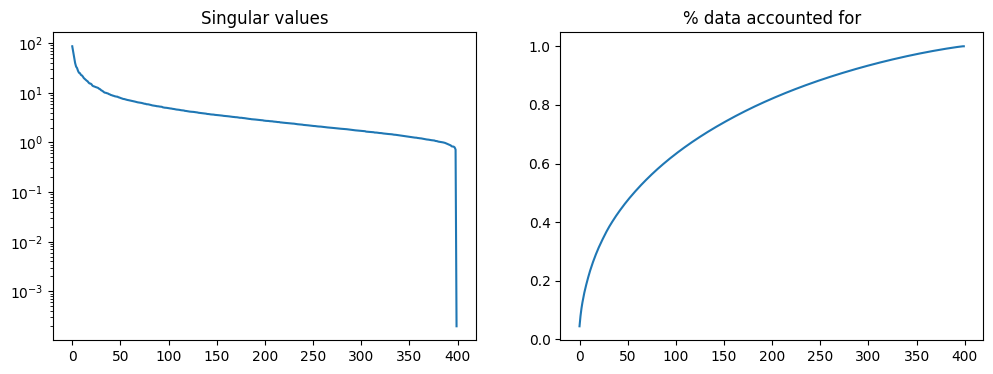

In [7]:
plot_singular_vals(s)

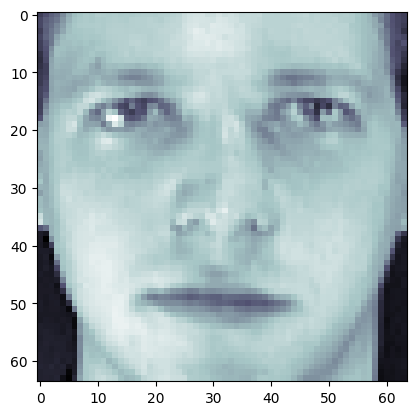

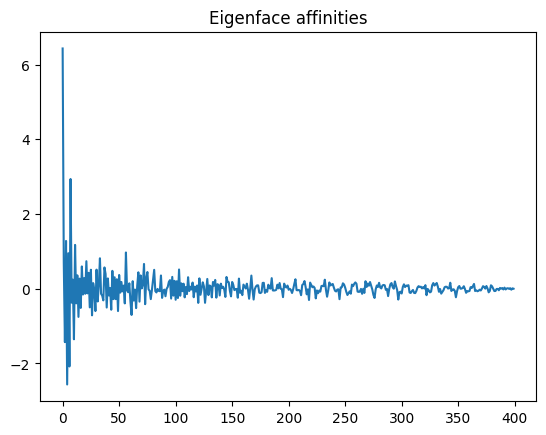

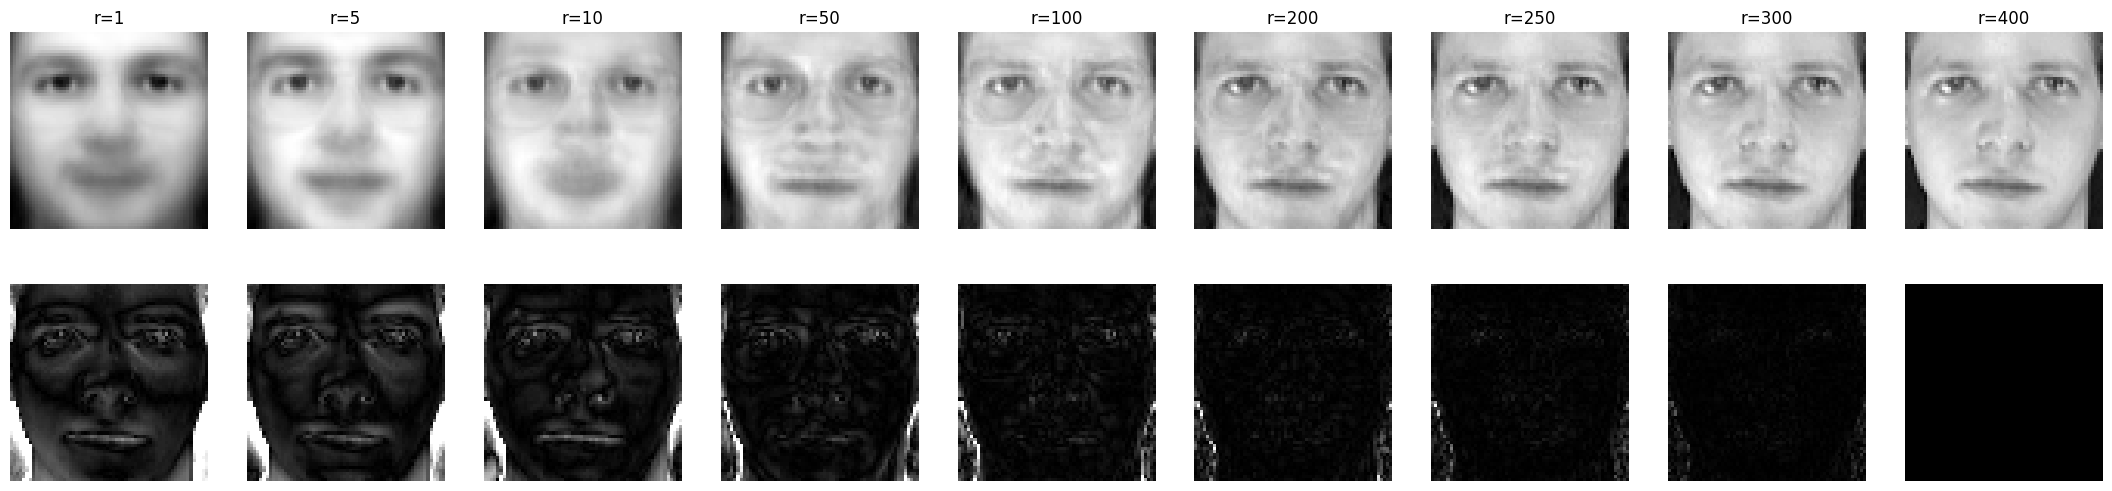

In [8]:
p, pc = x[:, 0], x_centered[:, 0]
plt.imshow(p.reshape(64, 64), cmap="bone")
plt.show()

affin = u.T @ pc[:, None]
plt.plot(affin)
plt.title("Eigenface affinities")
plt.show()

rs = [1, 5, 10, 50, 100, 200, 250, 300, u.shape[1]]
fig, (axs, diff_axs) = plt.subplots(2, len(rs), figsize=(3*len(rs), 6))
for i, r in enumerate(rs):
    ax, diff_ax = axs[i], diff_axs[i]

    recon_centered = u[:, :r] @ affin[:r]
    recon = recon_centered + x_mean

    ax.imshow(recon.reshape(64, 64), cmap="grey")
    ax.set_title(f"r={r}")
    ax.set_axis_off()

    diff = np.abs(recon - p[:, None]) / p[:, None]
    diff_ax.imshow(diff.reshape(64, 64), cmap="grey", vmax=p.max())
    diff_ax.set_axis_off()
plt.show()